In [1]:
import access

In [2]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= access.c_id,
                                                           client_secret= access.c_se))

In [3]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

## Loading the dataset

In [4]:
X = pd.read_csv("spotify_1_audio_features.csv")

print()
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.220,0.00528,1,-36.410,0,0.0457,0.995,0.944,0.1290,0.3040,74.434,362787,4
1,0.210,0.14100,0,-15.641,1,0.0363,0.353,0.973,0.2440,0.0381,98.395,119467,3
2,0.210,0.14100,0,-15.641,1,0.0363,0.353,0.973,0.2440,0.0381,98.395,119467,3
3,0.477,0.00612,5,-36.199,1,0.0587,0.996,0.943,0.0702,0.3560,101.196,161600,3
4,0.388,0.23100,4,-15.395,0,0.0321,0.921,0.968,0.1180,0.5330,139.654,125733,4


In [5]:
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.220,0.00528,1,-36.410,0,0.0457,0.995,0.944,0.1290,0.3040,74.434,362787,4
1,0.210,0.14100,0,-15.641,1,0.0363,0.353,0.973,0.2440,0.0381,98.395,119467,3
2,0.210,0.14100,0,-15.641,1,0.0363,0.353,0.973,0.2440,0.0381,98.395,119467,3
3,0.477,0.00612,5,-36.199,1,0.0587,0.996,0.943,0.0702,0.3560,101.196,161600,3
4,0.388,0.23100,4,-15.395,0,0.0321,0.921,0.968,0.1180,0.5330,139.654,125733,4


In [6]:
X.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000
mean,0.631335,0.671121,5.371878,-7.861139,0.560032,0.084641,0.254535,0.144808,0.179343,0.553071,122.471425,235010.656728,3.946011
std,0.172980,0.223827,3.541073,4.492330,0.496483,0.082662,0.296590,0.288256,0.142280,0.262691,28.119958,84441.046714,0.294218
min,0.068500,0.002160,0.000000,-36.797000,0.000000,0.024000,0.000002,0.000000,0.019700,0.031500,40.552000,47000.000000,1.000000
25%,0.517250,0.546000,2.000000,-9.258000,0.000000,0.039400,0.015525,0.000002,0.093600,0.347250,100.130750,180326.250000,4.000000
50%,0.662000,0.706000,6.000000,-6.762500,1.000000,0.053300,0.119000,0.000446,0.122000,0.567000,122.995000,218385.500000,4.000000
75%,0.762000,0.844000,8.000000,-5.081250,1.000000,0.088925,0.423000,0.063975,0.222750,0.777000,138.281500,266886.750000,4.000000
max,0.978000,1.000000,11.000000,-0.514000,1.000000,0.723000,0.996000,0.980000,0.976000,0.980000,203.006000,853827.000000,5.000000


In [7]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.220,0.00528,1,-36.410,0,0.0457,0.995,0.944,0.1290,0.3040,74.434,362787,4
1,0.210,0.14100,0,-15.641,1,0.0363,0.353,0.973,0.2440,0.0381,98.395,119467,3
2,0.210,0.14100,0,-15.641,1,0.0363,0.353,0.973,0.2440,0.0381,98.395,119467,3
3,0.477,0.00612,5,-36.199,1,0.0587,0.996,0.943,0.0702,0.3560,101.196,161600,3
4,0.388,0.23100,4,-15.395,0,0.0321,0.921,0.968,0.1180,0.5330,139.654,125733,4


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-2.378414,-2.975398,-1.234868,-6.356304,-1.128226,-0.471183,2.497098,2.773072,-0.353905,-0.948343,-1.708648,1.513507,0.183536
1,-2.436236,-2.368915,-1.517325,-1.732159,0.886347,-0.584921,0.332058,2.873697,0.454525,-1.960763,-0.856377,-1.368611,-3.215992
2,-2.436236,-2.368915,-1.517325,-1.732159,0.886347,-0.584921,0.332058,2.873697,0.454525,-1.960763,-0.856377,-1.368611,-3.215992
3,-0.892392,-2.971644,-0.105039,-6.309325,0.886347,-0.313884,2.500470,2.769602,-0.767260,-0.750352,-0.756748,-0.869547,-3.215992
4,-1.407007,-1.966738,-0.387497,-1.677388,-1.128226,-0.635741,2.247545,2.856348,-0.431234,-0.076421,0.611169,-1.294390,0.183536


In [8]:
X_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2.482000e+03,2.482000e+03,2.482000e+03,2.482000e+03,2.482000e+03,2.482000e+03,2.482000e+03,2.482000e+03,2.482000e+03,2.482000e+03,2.482000e+03,2.482000e+03,2.482000e+03
mean,7.652912e-17,1.033867e-15,-2.844891e-17,1.753007e-16,4.817527e-16,-7.141302e-17,1.118275e-18,2.886938e-16,1.431391e-17,-3.846865e-17,5.498333e-16,1.265328e-17,9.263563e-16
std,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00,1.000202e+00
min,-3.254415e+00,-2.989340e+00,-1.517325e+00,-6.442468e+00,-1.128226e+00,-7.337500e-01,-8.583706e-01,-5.024595e-01,-1.122266e+00,-1.985892e+00,-2.913800e+00,-2.226980e+00,-1.001505e+01
25%,-6.596588e-01,-5.591181e-01,-9.524109e-01,-3.110062e-01,-1.128226e+00,-5.474118e-01,-8.060210e-01,-5.024514e-01,-6.027615e-01,-7.836680e-01,-7.946377e-01,-6.477351e-01,1.835362e-01
50%,1.773128e-01,1.558632e-01,1.774177e-01,2.446081e-01,8.863473e-01,-3.792235e-01,-4.570685e-01,-5.009119e-01,-4.031142e-01,5.303435e-02,1.862307e-02,-1.969245e-01,1.835362e-01
75%,7.555315e-01,7.725346e-01,7.423320e-01,6.189325e-01,8.863473e-01,5.183472e-02,5.681216e-01,-2.804763e-01,3.051415e-01,8.526134e-01,5.623501e-01,3.775713e-01,1.835362e-01
max,2.004484e+00,1.469641e+00,1.589703e+00,1.635815e+00,8.863473e-01,7.724066e+00,2.500470e+00,2.897986e+00,5.600364e+00,1.625540e+00,2.864542e+00,7.329860e+00,3.583064e+00


save the scaler for future use for the new user input song. save it using pickle

In [9]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open(r"C:\Users\Mauricio\Documents\GitHub\da_mauricio\Spotify\scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

In [10]:
def load_pickle(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 


In [11]:
scaler2 = load_pickle(r"C:\Users\Mauricio\Documents\GitHub\da_mauricio\Spotify\scaler.pickle")
scaler2

StandardScaler()

## Clustering with K-Means

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

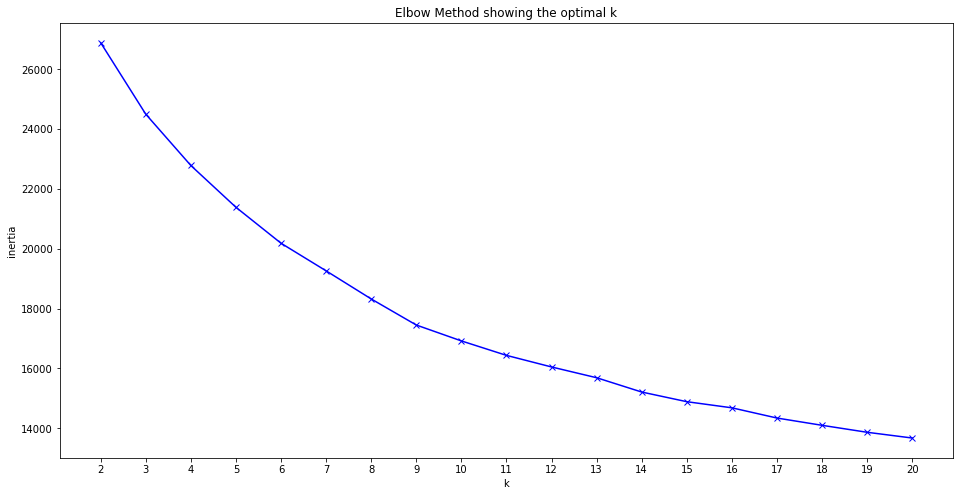

In [12]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

4 , 7 , 11

## Choosing K

In [13]:
kmeans = KMeans(n_clusters=11, random_state=1234)
kmeans.fit(X_scaled_df)

KMeans(n_clusters=11, random_state=1234)

In [14]:
clusters = kmeans .predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()
kmeans.inertia_

16436.68201936831

In [20]:
X["Clusters"] = clusters
X_scaled_df = X
X_scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Clusters
0,0.220,0.00528,1,-36.410,0,0.0457,0.99500,0.94400,0.1290,0.3040,74.434,362787,4,0
1,0.210,0.14100,0,-15.641,1,0.0363,0.35300,0.97300,0.2440,0.0381,98.395,119467,3,6
2,0.210,0.14100,0,-15.641,1,0.0363,0.35300,0.97300,0.2440,0.0381,98.395,119467,3,6
3,0.477,0.00612,5,-36.199,1,0.0587,0.99600,0.94300,0.0702,0.3560,101.196,161600,3,0
4,0.388,0.23100,4,-15.395,0,0.0321,0.92100,0.96800,0.1180,0.5330,139.654,125733,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,0.659,0.62800,0,-8.685,0,0.1790,0.18600,0.00000,0.1050,0.2620,94.050,219427,4,5
2478,0.388,0.63100,4,-6.328,0,0.0391,0.00939,0.00474,0.3720,0.2760,112.033,201432,3,2
2479,0.538,0.55700,11,-8.678,1,0.0914,0.26200,0.91400,0.1020,0.5060,131.030,231724,4,9
2480,0.811,0.72600,0,-3.995,1,0.0813,0.15400,0.00000,0.1160,0.6660,131.027,264920,4,8


In [21]:
with open (r"C:\Users\Mauricio\Documents\GitHub\da_mauricio\Spotify\scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

In [22]:
X_scaled_df.to_csv("spotify_2_clustering.csv", index=False)

In [23]:
with open ('kmeans_11.pickle', "wb") as f:
    pickle.dump(kmeans,f)